In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
from scipy import stats

In [2]:
df= pd.read_csv("C:/Users/user/Downloads/SampleSuperstore.csv")

In [3]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [28]:
df=df.rename(columns={'Ship Mode':'Ship_Mode','Postal Code':'Postal_Code','Sub-Category': 'Sub_Category'})

In [29]:
df.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [7]:
df.shape

(9994, 13)

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


No null values and missing values in the Dataset 

# # Univariate analysis

In [33]:
list(df.columns)

['Ship_Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal_Code',
 'Region',
 'Category',
 'Sub_Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [34]:
cat = []
con = []
for i in df.columns:
   if(df[i].dtypes=="object"):
       cat.append(i)
   else:
       con.append(i)

In [35]:
cat

['Ship_Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub_Category']

In [36]:
con

['Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit']

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Profit', ylabel='Density'>

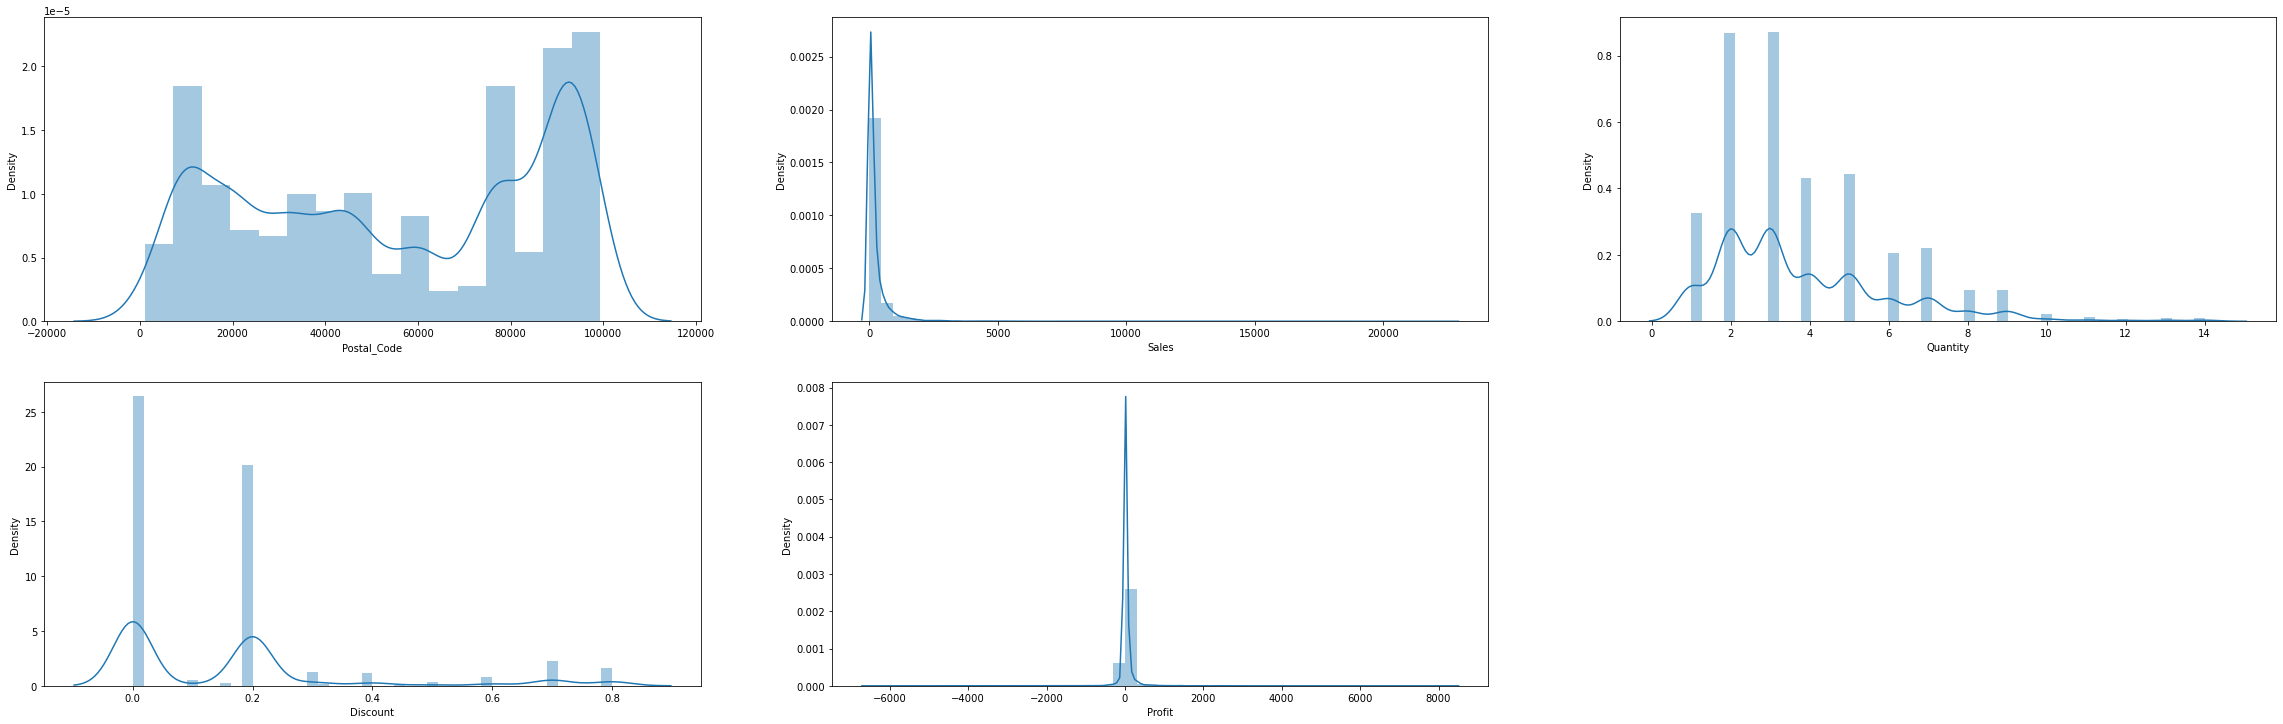

In [70]:
plt.figure(figsize=(40,19))
plt.subplot(3,3,1)
sb.distplot(df.Postal_Code)
plt.subplot(3,3,2)
sb.distplot(df.Sales)
plt.subplot(3,3,3)
sb.distplot(df.Quantity)
plt.subplot(3,3,4)
sb.distplot(df.Discount)
plt.subplot(3,3,5)
sb.distplot(df.Profit)

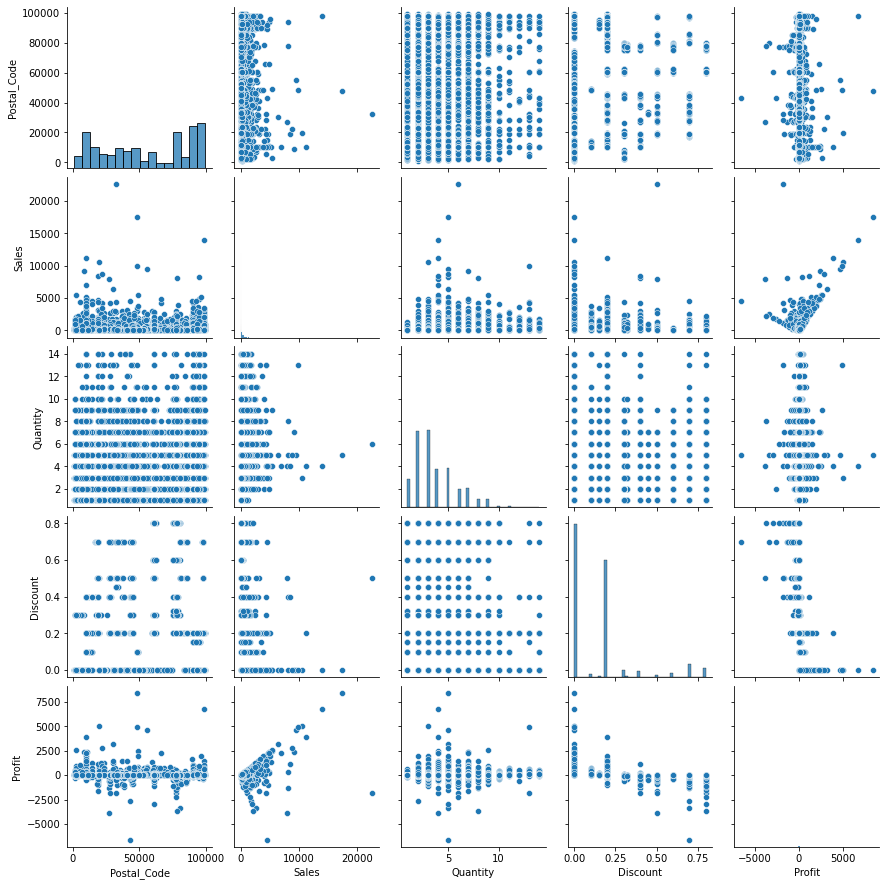

In [71]:
sb.pairplot(df)

# #Bivariate Analysis 

Text(0.5, 1.0, 'Quantity vs Profit scatterplot')

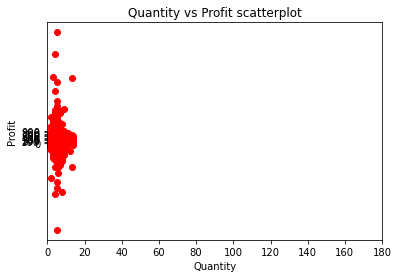

In [10]:
plt.scatter(df.Quantity,df.Profit,c='red')
plt.xticks(range(0,200,20))
plt.yticks(range(0,1000,100))
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.title("Quantity vs Profit scatterplot")

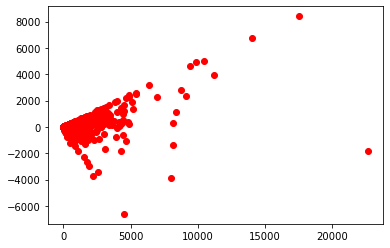

In [11]:
plt.scatter(df.Sales,df.Profit,c="red")

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region', ylabel='Profit'>

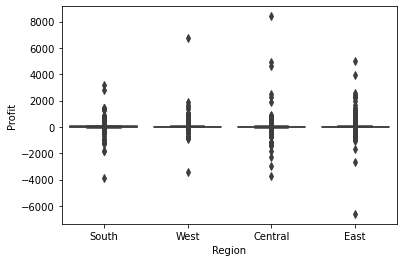

In [12]:
sb.boxplot(df.Region,df.Profit)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='Profit'>

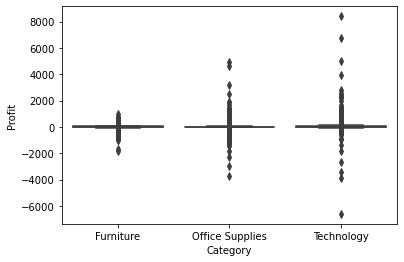

In [13]:
sb.boxplot(df.Category,df.Profit)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

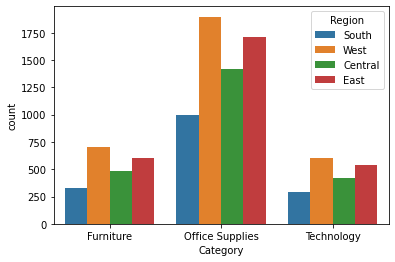

In [14]:
sb.countplot(df.Category,hue=df.Region)

In [15]:
pd.crosstab(df.Category,df.Region)

Region,Central,East,South,West
Category,,,,
Furniture,481,601,332,707
Office Supplies,1422,1712,995,1897
Technology,420,535,293,599


# Comparing Profit and Sales in Different Categories

In [73]:
mean_by_category=df.groupby('Category').mean('Sales')

In [74]:
mean_by_category[['Profit','Sales']]

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


Text(0.5, 1.0, 'Average Sale and Profit in Category')

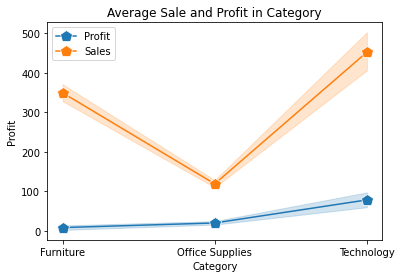

In [75]:
sb.lineplot(x=df.Category,y=df.Profit,marker='p',markersize=12)
sb.lineplot(x=df.Category,y=df.Sales,marker='p',markersize=12)
plt.legend(['Profit','Sales'])
plt.title("Average Sale and Profit in Category")

# Comparing Profit and Sales in Different Ship_mode

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='Sales'>

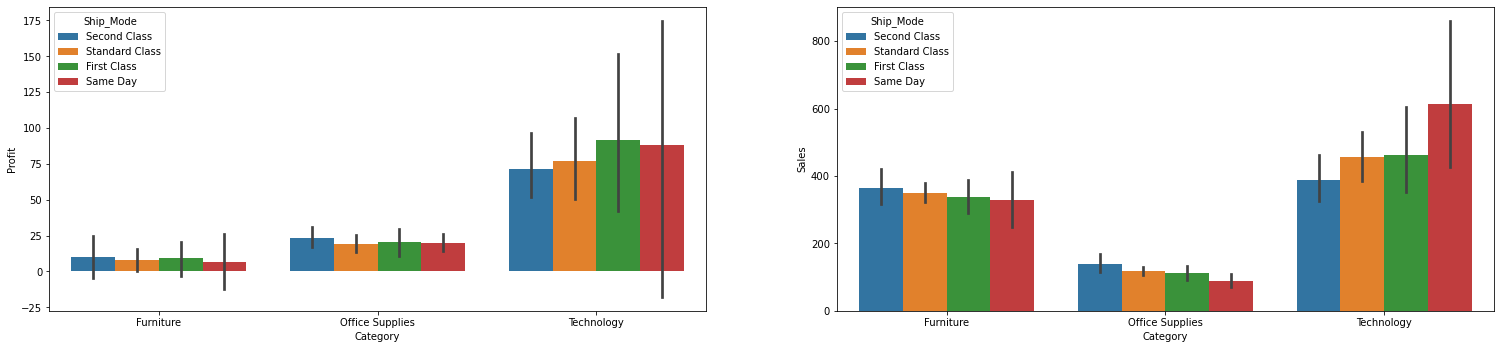

In [41]:
plt.figure(figsize=(40,19))
plt.subplot(3,3,1)
sb.barplot(df.Category,df.Profit,hue=df.Ship_Mode)
plt.subplot(3,3,2)
sb.barplot(df.Category,df.Sales,hue=df.Ship_Mode)

# Comparing Profit and Sales in Different Region

In [42]:
mean_by_Region=df.groupby(['Region'])[['Sales','Profit']].mean()
mean_by_Region
lables=mean_by_Region.index

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

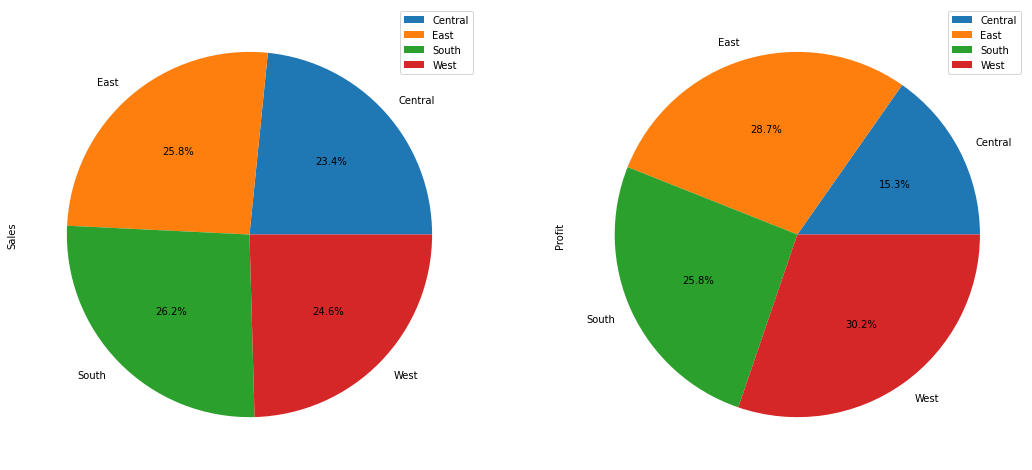

In [43]:
mean_by_Region.plot.pie(subplots=True,figsize=(18,20), autopct='%1.1f%%')

# Comparing Profit and Sales in Different Segment

In [44]:
mean_by_segment=df.groupby(['Segment'])[['Sales','Profit']].mean()
mean_by_segment

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

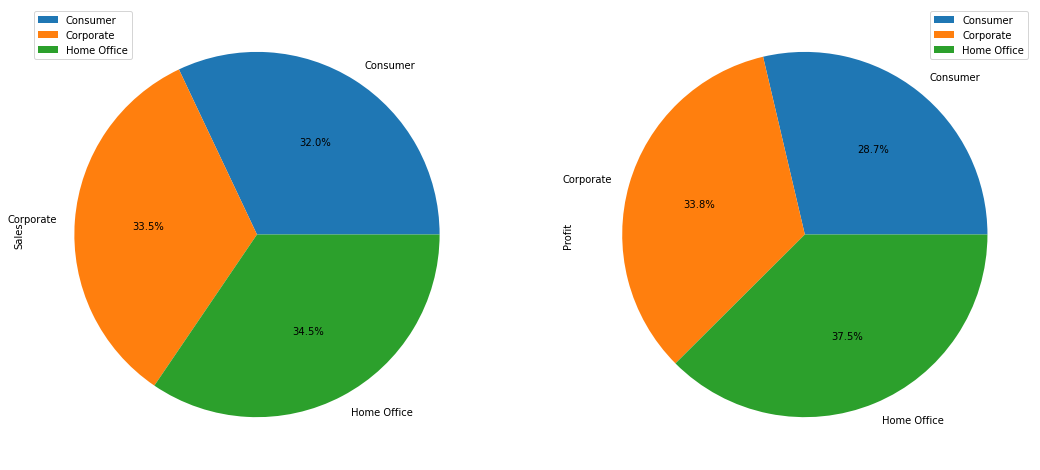

In [45]:
mean_by_segment.plot.pie(subplots=True,figsize=(18,20), autopct='%1.1f%%')

# Calculating Profit and Sales in subCategories

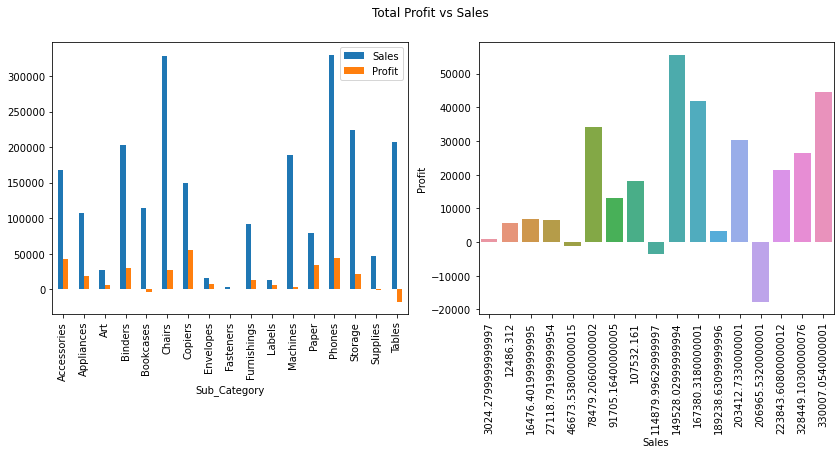

In [69]:
aggregate_Sub_Category=df.groupby(['Sub_Category'])[['Sales','Profit']].agg(sum)
fig,axes=plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total Profit vs Sales")
sb.barplot(x='Sales',y='Profit',data=aggregate_Sub_Category.reset_index()ax=axes[1])
aggregate_Sub_Category.plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()


# # Multivariate Analysis

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

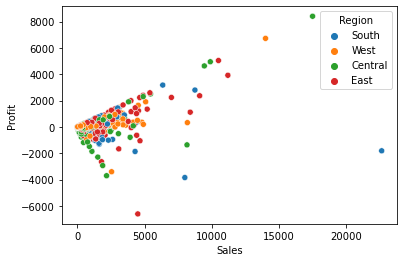

In [16]:
sb.scatterplot(df.Sales,df.Profit,hue=df.Region)

In [30]:
X=df[['Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [31]:
X.apply(np.mean)

Postal_Code    55190.379428
Sales            229.858001
Quantity           3.789574
Discount           0.156203
Profit            28.656896
dtype: float64

In [32]:
X.apply(np.std)

Postal_Code    32062.089163
Sales            623.213919
Quantity           2.224998
Discount           0.206442
Profit           234.248387
dtype: float64

# Calculating Correlations for Multivariate Data

In [37]:
corr = stats.pearsonr(X.Sales, X.Discount)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.004826752925377619
cor:		 -0.028190124157535558


This tells us that the correlation coefficient is about 0.028, which is a very weak correlation. 
Furthermore, the p-value for the statistical test of whether the correlation coefficient is significantly different
from zero is 0.004 so there is very weak evidence that that the correlation is non-zero.

In [39]:
X.corr()

,Postal_Code,Sales,Quantity,Discount,Profit
Postal_Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


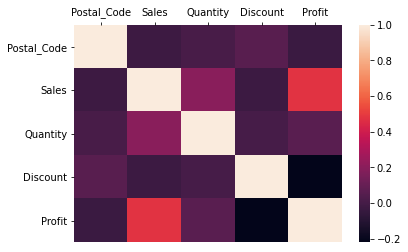

In [41]:
sb.heatmap(X.corr(), vmax=1., square=False).xaxis.tick_top()